Credit Risk Ensemble Model - Full Python Script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

1️⃣ Load Dataset

In [2]:
file_path = Path("loan_data_200.csv")
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(df.head(), "\n")

✅ Dataset loaded successfully!
Shape: (200, 33)
   loan_amnt  int_rate  installment home_ownership  annual_inc  \
0      16795    0.1178       577.12       MORTGAGE      104555   
1       1860    0.1198      1403.06       MORTGAGE       93698   
2      12284    0.1952      1301.78       MORTGAGE      144450   
3       7265    0.2294       700.59           RENT      156487   
4      17850    0.2274      1151.22            OWN      187231   

  verification_status   issue_d loan_status pymnt_plan    dti  ...  \
0     Source Verified  Mar-2019    low_risk          n  16.26  ...   
1        Not Verified  Feb-2019   high_risk          n   9.08  ...   
2        Not Verified  Jan-2019    low_risk          n  13.69  ...   
3        Not Verified  Apr-2019    low_risk          n   8.73  ...   
4            Verified  Apr-2019    low_risk          n   3.49  ...   

   tot_cur_bal  num_actv_bc_tl  num_actv_rev_tl  num_il_tl  num_rev_accts  \
0       236500               6               19         1

2️⃣ Basic Cleaning

In [3]:
df = df.dropna(axis='columns', how='all')
df = df.dropna()

if 'loan_status' in df.columns:
    df = df[df['loan_status'] != 'Issued']

# Ensure correct type for interest rate
if df['int_rate'].dtype == 'object':
    df['int_rate'] = df['int_rate'].str.replace('%', '', regex=False)
    df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce') / 100

3️⃣ Encode Categorical Variables

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Label encoding complete!")
print(f"Categorical Columns Encoded: {list(categorical_cols)}\n")


✅ Label encoding complete!
Categorical Columns Encoded: ['home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'application_type', 'hardship_flag', 'debt_settlement_flag']



4️⃣ Feature Selection

In [5]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

5️⃣ Split Data into Train & Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6️⃣ Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7️⃣ Train Ensemble Models

In [8]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    print(f"🚀 Training {name}...")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"\n📊 {name} Results:")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))
    print(f"✅ Accuracy: {acc:.4f}\n")

🚀 Training Random Forest...

📊 Random Forest Results:
[[ 0 13]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.67      0.96      0.79        27

    accuracy                           0.65        40
   macro avg       0.33      0.48      0.39        40
weighted avg       0.45      0.65      0.53        40

✅ Accuracy: 0.6500

🚀 Training AdaBoost...


D:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



📊 AdaBoost Results:
[[ 4  9]
 [11 16]]
              precision    recall  f1-score   support

           0       0.27      0.31      0.29        13
           1       0.64      0.59      0.62        27

    accuracy                           0.50        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.52      0.50      0.51        40

✅ Accuracy: 0.5000

🚀 Training Gradient Boosting...

📊 Gradient Boosting Results:
[[ 1 12]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.11      0.08      0.09        13
           1       0.61      0.70      0.66        27

    accuracy                           0.50        40
   macro avg       0.36      0.39      0.37        40
weighted avg       0.45      0.50      0.47        40

✅ Accuracy: 0.5000



8️⃣ Compare Model Performance

📈 Model Comparison:
                Model  Accuracy
0      Random Forest      0.65
1           AdaBoost      0.50
2  Gradient Boosting      0.50


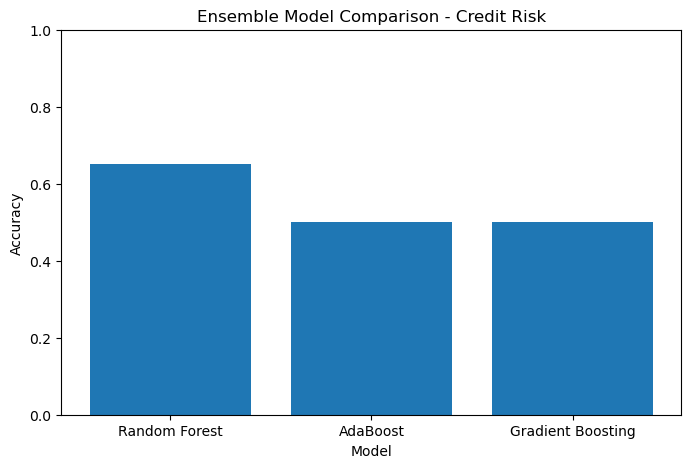

In [9]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("📈 Model Comparison:\n", results_df)

plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.title("Ensemble Model Comparison - Credit Risk")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

9️⃣ Save Cleaned Data & Model Results

In [10]:
cleaned_path = Path("cleaned_credit_risk.csv")
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned dataset saved as: {cleaned_path}")

print("\n🏁 All processing complete!")

✅ Cleaned dataset saved as: cleaned_credit_risk.csv

🏁 All processing complete!
